# Исследование рынка видеоигр

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

__Описание данных__

    Name — название игры

    Platform — платформа

    Year_of_Release — год выпуска

    Genre — жанр игры

    NA_sales — продажи в Северной Америке (миллионы проданных копий)

    EU_sales — продажи в Европе (миллионы проданных копий)

    JP_sales — продажи в Японии (миллионы проданных копий)

    Other_sales — продажи в других странах (миллионы проданных копий)

    Critic_Score — оценка критиков (максимум 100)

    User_Score — оценка пользователей (максимум 10)

__Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.__


__Краткий план действий: загрузить scv файл, изучить данный, глянуть общую информацию, затем предобработать их, а именно глянуть что у нас там с типами данными, обработать пропуски, проверить данные на дубликаты, посчитать суммарные продажи, далее провести исследовательский анализ, составить портрет(местный топ-5)для каждого из регионов, проверить гипотезы.... наконец напишем общий вывод.__

P.S. подробное описание тасков будет далее на каждом нашем этапе.

In [1]:
# импортируем нужные библиотеки.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

##  Откройте файл с данными и изучите общую информацию

In [2]:
try:
    data = pd.read_csv('/Users/alex/Downloads/games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')

In [3]:
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
NA_sales           float64
EU_sales           float64
JP_sales           float64
Other_sales        float64
Critic_Score       float64
User_Score          object
Rating              object
dtype: object

In [6]:
data.isna().mean()

Name               0.000120
Platform           0.000000
Year_of_Release    0.016093
Genre              0.000120
NA_sales           0.000000
EU_sales           0.000000
JP_sales           0.000000
Other_sales        0.000000
Critic_Score       0.513192
User_Score         0.400897
Rating             0.404786
dtype: float64

In [7]:
data['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [8]:
data['Year_of_Release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [9]:
data['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [10]:
data['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [11]:
data.duplicated().sum()

0

На данном этапе, мы можем констатировать - у нас имеются пропущенные значения, указаны не совсем корректные типы данных, явных дубликатов не обнаруженно, так же есть интересные наблюдения косаемо рейтинга, об этом далее.

## Подготовка данных

### Замените названия столбцов (приведите к нижнему регистру).

In [12]:
# приведем название столбцов к нижнему регистру

data.columns = [col.lower() for col in data.columns]

# сразу проверим

data.head()

# все ок, едем дальше

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему.

У нас имеются столбцы year_of_release - с типом float, что не совсем корректно на мой взгяд ведь у нас не может быть года с плавающей точкой(2000.5, 1999.99 и тд) , тут больше подойдейт __int__, таж же стобец user_score - имеет тип object, что не совсем понятно, изменим тип на __float__

In [13]:
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

В столбце year_of_release имеется значение nan, для того чтобы изметить тип на int, сначала нужно избавиться от nan

In [14]:
data[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


У нас имеется меньше 2% незаполненных данных по году выпуска, т.к нет четкого понимания, как заполнить пропуски - принимаем решение избавиться от них.

In [15]:
# длина дф ДО удаления

data.shape[0]

16715

In [16]:
# удалим пропущеные значения и восстановим индексы

data = data.dropna(subset = ['year_of_release']).reset_index(drop = True)

In [17]:
# ПОСЛЕ

data.shape[0]

# все ок, едем дальше

16446

In [18]:
# теперь изменим тип данных

data['year_of_release'] = data['year_of_release'].astype('int')
data['year_of_release'].dtypes

# ok

dtype('int64')

__Теперь глянем user_score__

In [19]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В __Пользовательских оценках__ мы имеем следующие значения - TBD(to be defined) - "будет определено", т.е на данный момент - это пропуски, поэтому заменим значения на nan

In [20]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan

# глянем на результат

data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [21]:
# изменим тип 

data['user_score'] = data['user_score'].astype('float')
data['user_score'].dtype

dtype('float64')

__Critic_score__ из описания мы знаем, что оценка критиков - это "100 бальная шкала", изменим на целочисленный тип данных.

In [22]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

### Обработайте пропуски при необходимости:

Ранее обработали пропуски в year_of_release, теперь глянем что у нас с __name, genre, critic_score, user_score, rating__

In [23]:
# глянем на кол-во пропусков и их доли, чтобы было понятно много их или мало по отношених ко всем данным

display(data.isna().sum())
display(data.isna().mean())

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         8983
rating             6678
dtype: int64

name               0.000122
platform           0.000000
year_of_release    0.000000
genre              0.000122
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.514593
user_score         0.546212
rating             0.406056
dtype: float64

In [24]:
# посмотрим долю пропусков 

pd.DataFrame(round(data.isna().mean().sort_values(ascending=False)*100,1)).style.background_gradient('coolwarm')

,0
user_score,54.600000
critic_score,51.500000
rating,40.600000
name,0.000000
genre,0.000000
platform,0.000000
year_of_release,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000


__name__ и __genre__ - имеют по два пропуска, возможно это одни и те же игры, глянем на них поближе.

In [25]:
data[data['name'].isna() & data['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
652,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14022,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Получается наши предположения были верны, избавимся от них.

In [26]:
# длина до
data.shape[0]

16446

In [27]:
data = data.dropna(subset = ['name']).reset_index(drop = True)

# длина ПОСЛЕ
data.shape[0]

16444

__critic_score__ и __user_score__ пропусков в данных столбцах - много, заменять пропуски на медиану или среднее это не совсем логично, т.к это могли быть игры либо старых годов выпуска, либо игры которые выпускались маленькими геймдев студиями, либо просто не имели популярность и тд, много различных факторов.

Удалять их тоже нельзя, тк их больше 8000, что состовляет почти половину нашего датасета. Оставим их, как есть



In [28]:
display(data[data['critic_score'].isna()])
display(data[data['user_score'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


__rating__ - рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию. Погуглив имеем следующее вредставление о рейтингах.

      «EC» («Early childhood») — «Для детей младшего возраста»
      
      «E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов (ранее с 6 лет). Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первоначально "K-A" ("Kids to Adults")
      
      «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
      
      «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет
      
      «M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет.
      
      «AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет.
      
      «RP» («Rating Pending») — «Рейтинг ожидается»
      
У нас имеются игры со старой аббревиатурой "К-А", заменим ее на текущий "Е" рейтинг, рейтинг "RP" - по сути это пустое на данный момент значение, его можно заменить на новое значение "NR"(no rating - нет рейтинга), так же поступим и с пропущенными значениями.

In [29]:
data['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

In [30]:
# заменим К-А на Е рейтинг и RP на NR
data['rating'] = data['rating'].replace('K-A', 'E')
data['rating'] = data['rating'].replace('RP', 'NR')

In [31]:
# заполним пустые значения на NR - no rating

data['rating'] = data['rating'].fillna('NR')

In [32]:
data['rating'].value_counts()

NR      6677
E       3924
T       2905
M       1536
E10+    1393
EC         8
AO         1
Name: rating, dtype: int64

In [33]:
# проверим, что у нас получилось

data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64


На данном этапе мы проделали следующие действия : удалили строки с пустыми значениями в имени и жанре, переименовали и добавили новую котегорию в возростном рейтинге, оценки критиков и пользователей решили отсавить как есть. 

### Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [34]:
# создадим столбец total_sales, сложим все продажи по регионм и запишем в него результат.

data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [35]:
# глянем, что вышло 

data.head()

# ок, едем дальше

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NR,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NR,31.38


Выявили неявные дубликаты, чтобы не искажались наши дальнейшие исследования - удалим дубликат с индексом __15969__ тк в нем есть пропуски по продажам, а они нам нужны.

In [36]:
data[data[['name', 'platform','year_of_release']].duplicated(keep = False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
600,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E,2.56
15969,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E,0.01


In [37]:
# Удалим его и восстановим индексы

data.drop(index = 15969).reset_index(drop = True, inplace= True)

Промежуточный вывод.

На данном этапе мы проделали следующие операции:

    - Заменили названия столбцов (привели к нижнему регистру)
    - Изменили типы данных в столбац year_of_release(в int) и user_score(float)
    - Обработали пропуски в year_of_release, name, genre, что касается critic_score и user_score - решили оставить как есть, тк заполнить их не чем, а удалять их нельзя, пропусков около 8000.
    - добавили новый возрастной рейтинг NR - так мы заполнили пропуски в столбце rating
    - добавили новый столбец total_sales
    - выявили неявные дубликаты

## Проведите исследовательский анализ данных

### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [38]:
# взглянем на количество выпущенных игр по годам

data['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64

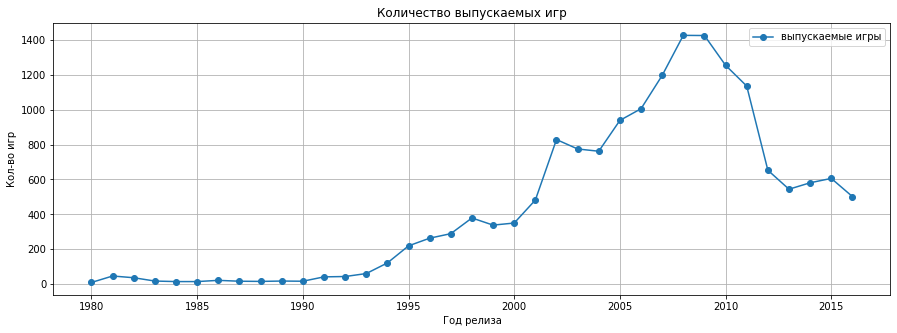

In [39]:
# сгруппируем игры по годам и посчитаем их количество, отобразим на графике

plt.figure(figsize = (15, 5))

plt.plot(data.groupby('year_of_release')['name'].count(), 'o-', label = 'выпускаемые игры', alpha = 1)
plt.xlabel('Год релиза')
plt.ylabel('Кол-во игр')
plt.title('Количество выпускаемых игр')
plt.grid(True)
plt.legend()

plt.show()

Как мы можем заметить стремительный рост по количеству выпускаемых игр приходится на нулевые, тогда на свет вышли такие шедевры как: Warcraft, Max Payne, Command & Conquer: Red Alert 2, Starcraft, Diablo и тд.

Пиковые значения приходятся на 2007-2010 года, доходит до ~ 1400 выпускаемых игр в год.

__Отвечая на вопрос__ про важность данных за весь период с 80х по 2016, отвечу - на мой вгляд данные до 1991-1993 года - очень малы, пилились малыми студиями, и не имели популярности, а далее в ближайшие пару-тройку лет мир познакомится с PS, Sega,Dendy  и тд, это и перевернет все отношение к видеоиграм и это коммьюнити будет с годами только рости, что в свою очередь будет так сказать поддыкивать геймдевов делать новые игрушки.

### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [40]:
# создадим сводную таблицу по платформам

platforms_sales = data.pivot_table(
    index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales', ascending = False)

platforms_sales.head(10)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Глядя на таблицу мы видим явного фаворита PS2, за ним следуют X360,PS3,Wii,DS,PS с хорошим таким отрывом от следующих платформ.

In [41]:
# запишим этих лидеров в отдельную серию

top_platforms_sales = platforms_sales.reset_index()['platform'].head(6)
top_platforms_sales

0     PS2
1    X360
2     PS3
3     Wii
4      DS
5      PS
Name: platform, dtype: object

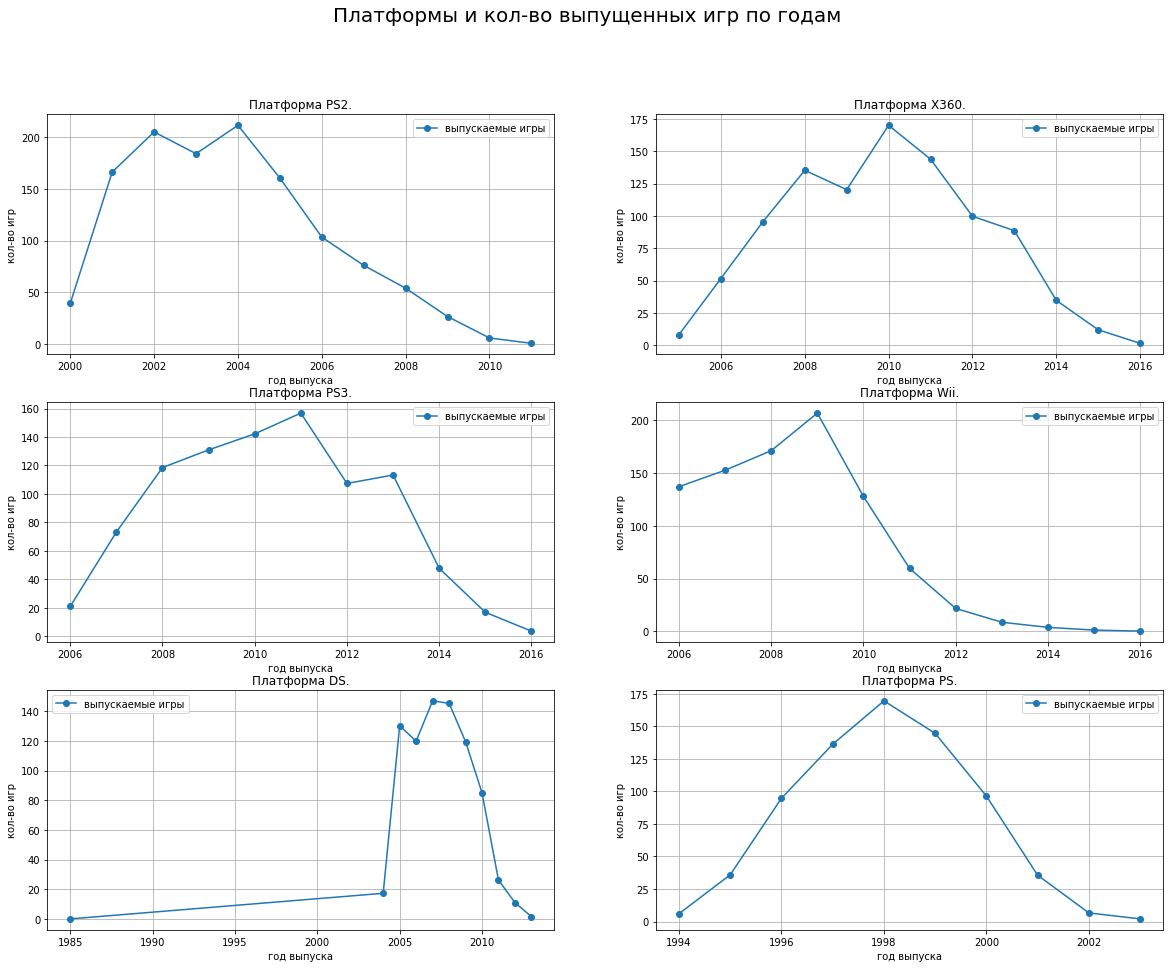

In [42]:
# напишем цикл для построения графиков для каждой платформы из top_platforms_sales по кол-ву вупущенных игр по годам

count = 0 # наш счетчик

plt.figure(figsize = (20, 15))
plt.suptitle('Платформы и кол-во выпущенных игр по годам', fontsize = 20)

for i in top_platforms_sales:
    count += 1
    plt.subplot(3, 2, count)
    platform_sales = data.query('platform == @i').pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
    plt.plot(platform_sales, 'o-', label = 'выпускаемые игры', alpha = 1)
    plt.ylabel('кол-во игр')
    plt.xlabel('год выпуска')
    plt.title(f'Платформа {i}.')
    plt.grid(True)
    plt.legend()
    
plt.show()

Отвечая на вопрос __За какой характерный срок появляются новые и исчезают старые платформы?__ : можно сказать следующее, на графиках мы видим "жизненный цикл" разных платформ, от 7 до 25 лет, где в среднее значение будет примерно 11 лет.

### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Актуальным периодом для дальнейших исследований можно взять данные за последние 5 лет , так как именно с 2006 по 2011 года было выпущенно самое максимальное количество игр(а это почти 10 лет и не совсем корректно брать такие данные для прогнозирования на следующий 2017 год), далее после чего началось снижение выпускаемых игр, это может быть связано с тем что был мировой экономичкий кризис(с 2008 по 2013 год), в следствии чего часть инвесторов скорее всего пропало, и геймдев студии начали делать меньше игр, хотя геймкоммюнити с каждым годом увеличивалось. Поэтому промежуток с 11 по 16 год будет максимально показательным.

In [43]:
# создадим отсеченный дф от 2012 года

data_2012 = data.query('year_of_release >= 2012')
data_2012

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NR,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NR,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16432,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NR,0.01
16436,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NR,0.01
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NR,0.01
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NR,0.01


### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ

In [44]:
# создадим сводную таблицу по продажам за 5 лет

pd.pivot_table(data_2012, index = 'platform', columns = 'year_of_release', values = 'total_sales', aggfunc = 'sum')


year_of_release,2012,2013,2014,2015,2016
platform,,,,,
3DS,51.36,56.57,43.76,27.78,15.14
DS,11.01,1.54,NaN,NaN,NaN
PC,23.22,12.38,13.28,8.52,5.25
PS3,107.36,113.25,47.76,16.82,3.60
PS4,NaN,25.99,100.00,118.90,69.25
PSP,7.69,3.14,0.24,0.12,NaN
PSV,16.19,10.59,11.90,6.25,4.25
Wii,21.71,8.59,3.75,1.14,0.18
WiiU,17.56,21.65,22.03,16.35,4.60


Как мы можем заметить, за этот период держутся на 'плаву' несколько платформ, такие как PS4, XOne, 3DS, PC, WiiU - ps4 со значительным отрывом от своих конкурентов варвалась вперед.

Но, как видно из предыдущих 2015 и 2014 года, ps4 как и остальные просела в продажах.

Отвечая на вопрос __Выберите несколько потенциально прибыльных платформ__, нельзя точно назвать какую либо из платформ прибыльной или убыточной, т.к мы не знаем сколько каждая из компаний потратила денег на разработку игр, быть может часть заработанных игр - это проданные повторно копии игр выпущенных ранее.

В любом случае можно констатировать тот факт, что платформа PS4 - продала больше чем остальные за неполный 2016 год.

In [45]:
# запишем наши платформы в виде списка

platform_list = ['PS4', 'XOne', '3DS', 'PC', 'WiiU']
platform_list

['PS4', 'XOne', '3DS', 'PC', 'WiiU']

### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

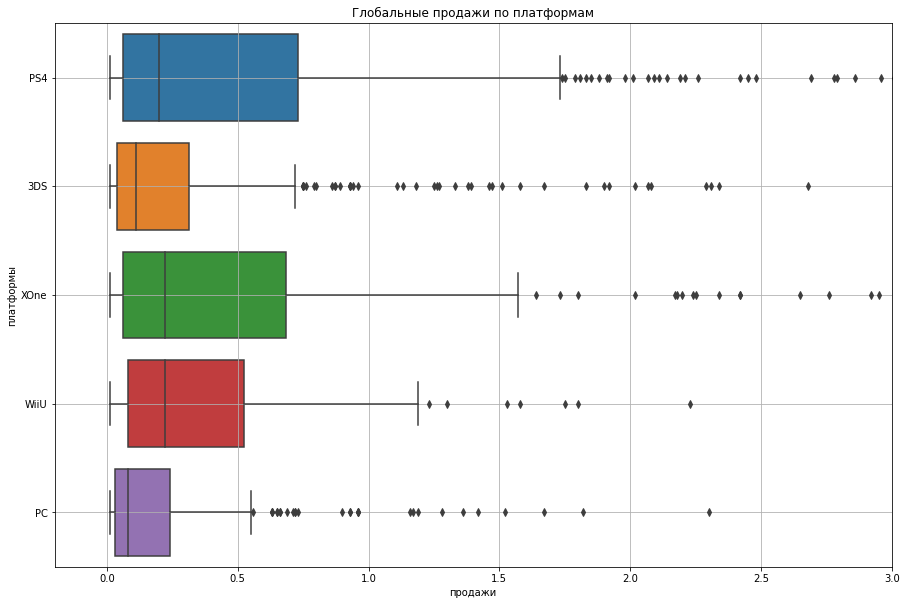

In [46]:
# строим ящик с усами для наших платформ

plt.figure(figsize=(15, 10))

sns.boxplot(x = 'total_sales', y = 'platform', data = data_2012.query('platform in @platform_list'))
plt.xlabel('продажи')
plt.ylabel('платформы')
plt.title('Глобальные продажи по платформам')
plt.xlim(-0.2, 3)
plt.grid(True)

plt.show()

Глядя на "ящики" можем сказать следующее: у каждой из платформ присутсвуют выбросы - вероятно это супер удачные тайтлы от той или иной компании, платформа PC самая не популярная, однако имеет самые маленькие усы - что можно трактовать, как стабильность в прибыльности, среднее значение продаваемых игр на пк так же самое низкое, интересная картина  - медианные значения всех платформ менее 1 миллиона - что говорит о том, что не каждый проект(игра) супер продающаяся

### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

__Будем рассматривать платформу PS4.__

Так как корреляции чувствительна к выбросам, мы отсортируем наши продажи и оценки, и будем использовать только те строки в которых оценки пользователей и критиков проставленны ,а что касается цены - предельное значение выставим согласно стандартному отклонению, как видно из предыдущего графика приблезительно ~ 1.6 млн.

In [47]:
# проверим

data[(data['platform'] == 'PS4')]['total_sales'].describe()

count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: total_sales, dtype: float64

In [48]:
# отсортируем наши данные 

data_ps4 = data[(data['platform'] == 'PS4') & (data['total_sales'] < 1.6) & (~data['user_score'].isna()) & (~data['critic_score'].isna())]
data_ps4


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1195,Wolfenstein: The New Order,PS4,2014,Shooter,0.47,0.80,0.03,0.24,79.0,8.1,M,1.54
1311,NBA 2K14,PS4,2013,Sports,0.89,0.31,0.01,0.23,85.0,6.5,E,1.44
1543,Metal Gear Solid V: Ground Zeroes,PS4,2014,Action,0.45,0.47,0.17,0.18,75.0,6.2,M,1.27
1639,WWE 2K16,PS4,2015,Sports,0.41,0.60,0.00,0.20,73.0,7.4,T,1.21
1755,WWE 2K15,PS4,2014,Sports,0.39,0.57,0.00,0.19,62.0,5.1,T,1.15
...,...,...,...,...,...,...,...,...,...,...,...,...
16216,Super Dungeon Bros,PS4,2016,Action,0.01,0.00,0.00,0.00,42.0,2.3,E10+,0.01
16229,Sherlock Holmes: The Devil's Daughter,PS4,2016,Adventure,0.01,0.00,0.00,0.00,70.0,6.8,T,0.01
16230,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,NR,0.01
16255,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.01


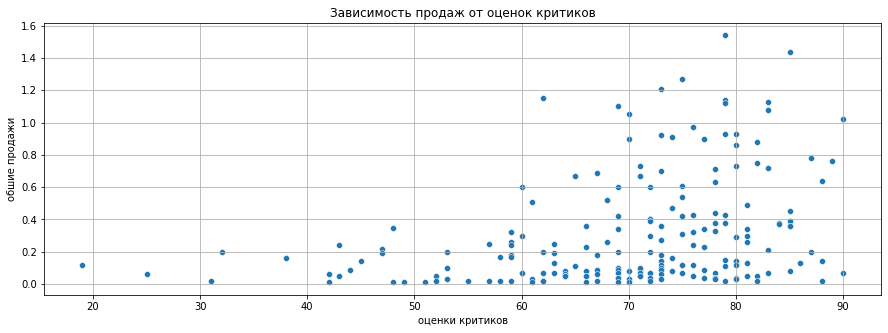

Коэффицент корреляции: 0.25


In [49]:
# построим диаграмму рассеяния critic_score х total_sales и подсчитаем корреляцию

plt.figure(figsize = (15, 5))

sns.scatterplot(x = 'critic_score', y = 'total_sales', data = data_ps4)
plt.xlabel('оценки критиков')
plt.ylabel('обшие продажи')
plt.title('Зависимость продаж от оценок критиков')
plt.grid(True)

plt.show()

critic_sales = data['critic_score'].corr(data['total_sales'])

print(f'Коэффицент корреляции: {round(critic_sales, 2)}')

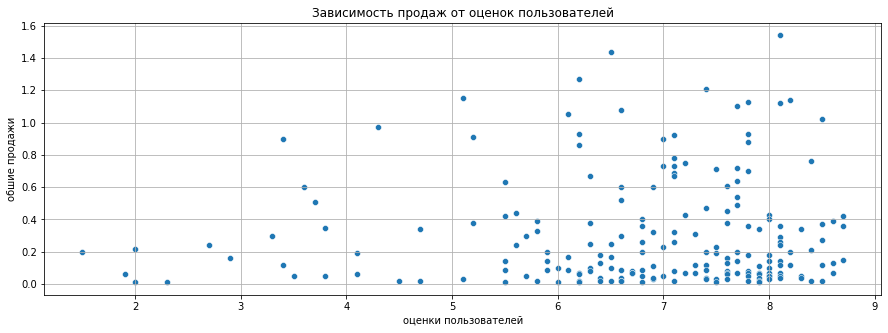

Коэффицент корреляции: 0.09


In [50]:
# построим диаграмму рассеяния user_score х total_sales и подсчитаем корреляцию

plt.figure(figsize = (15, 5))

sns.scatterplot(x = 'user_score', y = 'total_sales', data = data_ps4)
plt.xlabel('оценки пользователей')
plt.ylabel('обшие продажи')
plt.title('Зависимость продаж от оценок пользователей')
plt.grid(True)

plt.show()

critic_sales = data['user_score'].corr(data['total_sales'])

print(f'Коэффицент корреляции: {round(critic_sales, 2)}')

Как мы видим из представленных графиков и коэффицентов , что для оценок критиков к общей выручки, что и для пользовательских оценок - они очень малы, 0.25 и 0.09, можно сказать что теснота связи - __слабая(по шкале Чеддока)__. Мне кажется тут большую роль играет сама платформа, как бренд - ведь люди давно знают Playstation, и не смотря на оценки критиков и пользователей - все равно покупают игры,к тому же оценки критиков не всегда схожи с оценками пользователей. 

### Соотнесите выводы с продажами игр на других платформах.

Построим общий график рассевания, чтобы взглянуть на общую картину отношение всех оценок к суммарным продажам и пользовательских оценок к суммарным продажам(берем срез данных, как и в случае с PS4 с 2012 года)

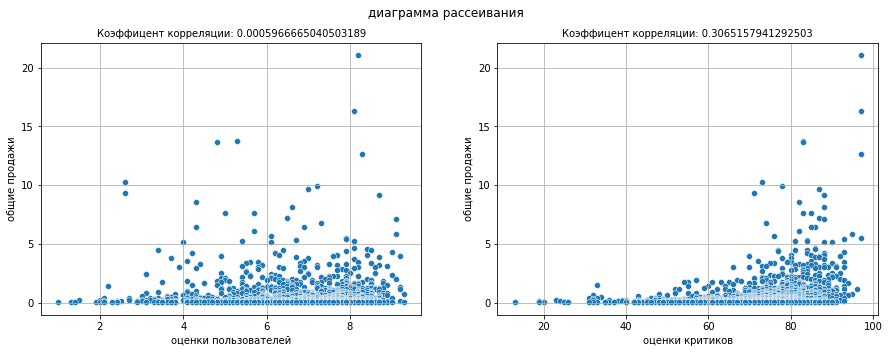

In [51]:
# отсеим игры которые имеют пропуски в user_score и critic_score
data_without_null = data_2012[(~data_2012['user_score'].isna()) & (~data_2012['critic_score'].isna())]

# построим 2 диаграммы
plt.figure(figsize = (15, 5))
plt.suptitle('диаграмма рассеивания')

plt.subplot(1, 2, 1)
sns.scatterplot(x = 'user_score', y = 'total_sales', data = data_without_null)
plt.xlabel('оценки пользователей')
plt.ylabel('общие продажи')
plt.title(f'\nКоэффицент корреляции: {data_without_null["user_score"].corr(data_without_null["total_sales"])}', fontsize=10)
plt.grid(True)


plt.subplot(1, 2, 2)
sns.scatterplot(x = 'critic_score', y = 'total_sales', data = data_without_null)
plt.xlabel('оценки критиков')
plt.ylabel('общие продажи')
plt.title(f'\nКоэффицент корреляции: {data_without_null["critic_score"].corr(data_without_null["total_sales"])}', fontsize=10)
plt.grid(True)

plt.show()

Как и в случае с PS4 мы наблюдаем схожую картину, да она положительная, но прямой и сильзой зависимости не прослеживается. Т.е не происходит такого чтобы критики поставили малую оценку и все пользователи отказались покупать игру, то же самое и касается игроков, тут еще больше сторонних факторов, например любитель шутеров и экшенов купил игру по чьей-то рекомендации жанра.... скажем стратегии, ему не понравилось и ведь это не значет, что игра плохая и другие игроки перестанут покупать ее.

### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Сделаем сводной таблицу по жанрам и их продажам за весь период 

In [52]:
data_genre_sales = data.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales', ascending = False)
data_genre_sales

,total_sales
genre,
Action,1716.52
Sports,1309.67
Shooter,1041.36
Role-Playing,931.08
Platform,825.55
Misc,790.29
Racing,723.49
Fighting,442.66
Simulation,387.96


Жанр Action, оказался самым продаваемым жанром, такие жанры как Sports,Shooter,Playing,Platform,Misc,Racing с большим отрывом превосходят игры чей жанр находится ниже в таблице. Самый не популярный жанр - Strategy.

Для выявления более прибыльных жанров постоим boxplot

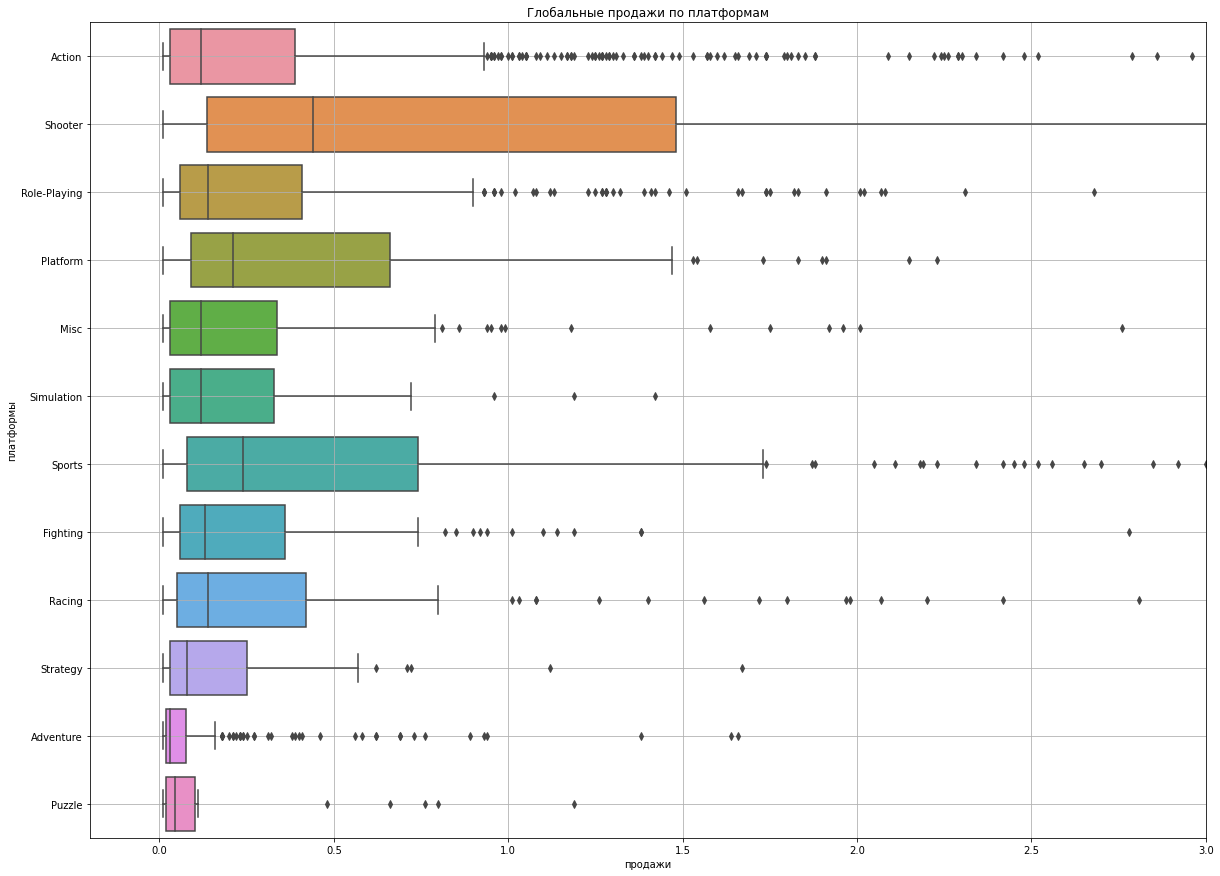

In [53]:
plt.figure(figsize=(20, 15))

sns.boxplot(x = 'total_sales', y = 'genre', data = data_2012)
plt.xlabel('продажи')
plt.ylabel('платформы')
plt.title('Глобальные продажи по платформам')
plt.xlim(-0.2, 3)
plt.grid(True)

plt.show()

# Вывод

Мы провели исследовательский анализ, в ходе которого выяснили, что рынок видеоигр пережил очень многое, начиная от плавного роста в 90х и формирования новой "культуры", инновационных 00х, когда на свет появились шедевры, у которых до сих пор миллионы фанатов по всему миру, затем были пиковые года, значения по выпуску видеоигр в которых достигало почти 1500 игр, и далее снижении вускаемых игр - что могло быть связано с всемирным экономическим кризисом.

Далее мы узнали, что средний жизненный цикл платформ варьируется около 10 лет, ведь всегда на смену старым платформам приходят более новые, современные и мощные платформы. Определили соответствующий актуальный период, за точку отсчета взяли 2012 год, и вычеслили самые "прибыльные" платформы за данный период.

Далее мы изучили зависимость оценок и общих продаж в рамках одной из крупных платформ - PS4, и выяснили, что оценки критиков практически не влияют на уровень продаж видеоигр. Эта картина сохранилась так же и для общей картины по всем платформам.

Исторически-популярными стали жанры такие как: экшены, игры спортивной тематики, шутеры и рпг.

## Составьте портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):

    -Самые популярные платформы (топ-5). Опишите различия в долях продаж.
    -Самые популярные жанры (топ-5). Поясните разницу.
    -Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Создадим две функции для выявления топ 5 платформ в том или ином регионе, а так же фукнцию строящую графики по этим топ платформам.

In [54]:
# функция топ-платформ

def top_n_items(df, group_field, method='count', sum_field='none', n_items=5):
    """
    Функция возвращает top-N значений столбца датафрейма df, сгруппированных по полю group_field.
    
    Parameters
    ----------
    df: Pandas Dataframe
        Набор данных.
    group_field: string
        Поле, по которому будет сделана группировка данных.
    method: string
        count - значение по умолчанию, sum - второе возможное значение.
    sum_field: int
        Название поля, по которому будет посчитана сумма при группировке.
    n_items: string
        5 - значение по умолчанию. Количество возвращаемых значений.
    
    Returns
    -------
    top_N_items: list
        Cписок top-N значений поля group_field, полученного в результате применения метода method
        по полю sum_field к набору данных df
    df_grouped: Pandas Dataframe
        Датафрейм с top-N значений поля group_field и статистика после применения метода method
    """
    
    # определяем top-N позиций
    if method == 'count':
        df_grouped = df.groupby(group_field)['name'].count().reset_index()
    elif method == 'sum' and sum_field != 'none':    
        df_grouped = df.groupby(group_field)[sum_field].sum().reset_index()
    else:
        return
    
    df_grouped.columns = [group_field, method]
    df_grouped.sort_values(by = method, ascending = False, inplace = True)
    top_N_items = df_grouped[group_field].head(n_items).to_list()
    
    return top_N_items, df_grouped.head(n_items)

In [55]:
# фунция визуализации

def plot_region(df, sum_field, method = 'sum', n_items = 5):
    
    """
    Функция выводит на экран набор графиков для проведения анализа портрета пользователя:
    - top-N платформ по продажам
    - top-N жанров по продажам
    - продажи по рейтингу
    
    Parameters
    ----------
    df: Pandas Dataframe
        Набор данных.
    sum_field: string
        Поле, по которому будет сделана группировка данных.
    method: string
        count - значение по умолчанию, sum - второе возможное значение.
    n_items: string
        5 - значение по умолчанию. Количество возвращаемых значений.
    
    Returns
    -------
        Функция возвращает None.
    """
    
    # получаем список и датафрейм top-N значений по платформе и жанру
    top_5_platforms , df_top_5_platforms = top_n_items(df, 'platform', method = method
                                                       , sum_field = sum_field, n_items = n_items)
    top_5_genres , df_top_5_genres = top_n_items(df, 'genre', method = method
                                                 , sum_field = sum_field, n_items = n_items)
    
    
    # задаем графики
    fig, ax = plt.subplots(1,3, figsize = (20,5))
    fig.subplots_adjust(hspace = 0.5)

    # top-N платформ по продажам
    ax[0].set_xlabel('Платформа', fontsize = 16)
    ax[0].set_ylabel('Продажи', fontsize = 16)
    ax[0].set_title('Продажи top-' + str(n_items) + ' платформ', fontsize = 16)
    ax[0].bar(df_top_5_platforms['platform'], df_top_5_platforms[method], color = 'red')

    # top-N жанров по продажам
    ax[1].set_xlabel('Жанр', fontsize = 16)
    ax[1].set_ylabel('Продажи', fontsize = 16)
    ax[1].set_title('Продажи top-' + str(n_items) + ' жанров', fontsize = 16)
    ax[1].bar(df_top_5_genres['genre'], df_top_5_genres[method], color = 'green')

    # продажи по рейтингу
    df_rating = df.groupby('rating')[sum_field].sum().reset_index()
    df_rating.columns = ['rating', method]

    ax[2].set_xlabel('Рейтинг', fontsize = 16)
    ax[2].set_ylabel('Продажи', fontsize = 16)
    ax[2].set_title('Продажи от рейтинга', fontsize = 16)
    ax[2].bar(df_rating['rating'], df_rating[method], color = 'blue')
    
    plt.show()

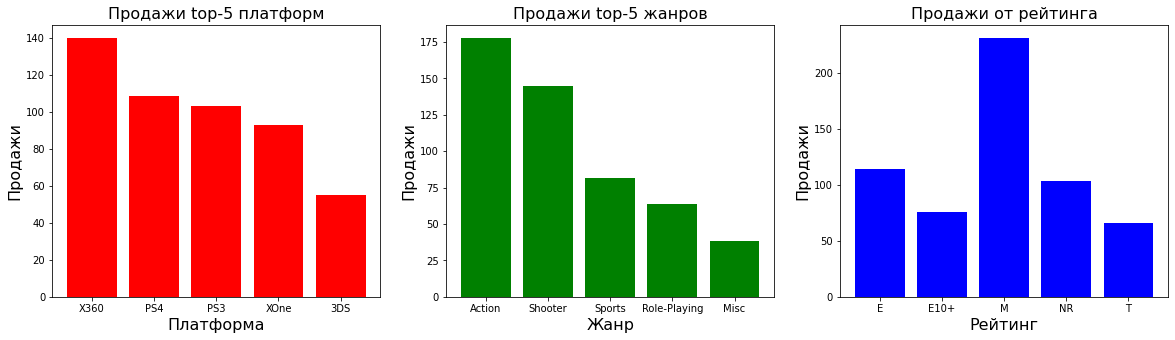

In [56]:
# Изучим NA регион

# вызываем нашу функцию с соответсвующим значением
plot_region(data_2012, 'na_sales', method = 'sum', n_items = 5)

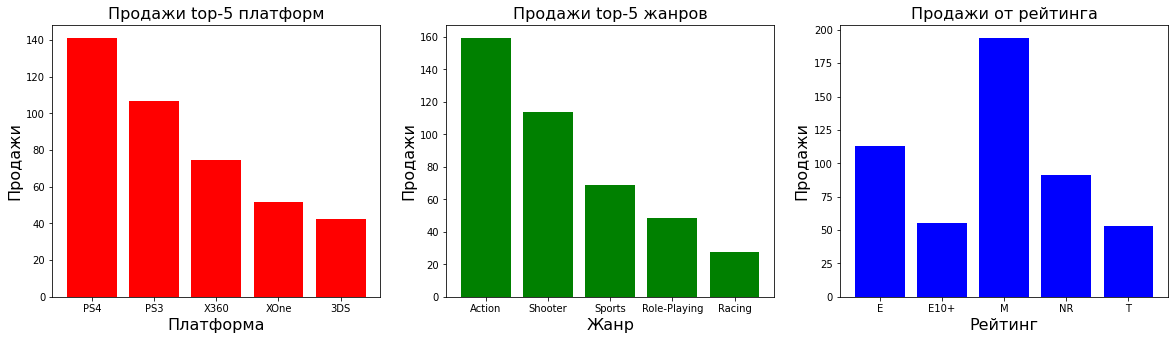

In [57]:
# Изучим EU регион

# вызываем нашу функцию с соответсвующим значением
plot_region(data_2012, 'eu_sales', method = 'sum', n_items = 5)

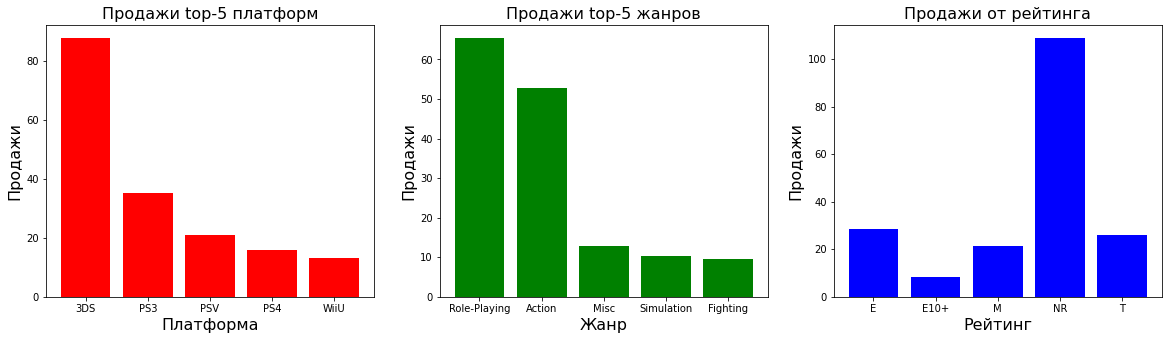

In [58]:
# Изучим JP регион

# вызываем нашу функцию с соответсвующим значением
plot_region(data_2012, 'jp_sales', method = 'sum', n_items = 5)

Изучив данные графики, можем охарактеризовать пользователей следующим образом: игроки из северной Америки из платформ предпочитают Xbox, скорее всего это из-за родины произхождения самой приставки, ведь это детище Microsoft, и впервые когда она вышла(это было в 2001-2002), она была прямым конкурентом PS2 на тот момент, затем... могу предположить, что пользователь из NA все больше и больше захлестывало интересом к японской платформе Playstation, ведь эти 'монстры' все чаще и чаще выпускали свои новые эксклюзывы, в которые можно было только поиграть на PS. Плюс в ближайшем будущем они вупутят PS3(2006 год). Поэтому платформа PS рассположена впритирку на втором месте.

Из жанров игроки предпочитают в большинстве своем игры жанра Экшен далее идет спортивные игры. Что касается возростного рейтинка, как мы можем заметить - это игры в основном игры с , рейтингом "М" - «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет.


EU игроки, в отличии от игроков из северной Америки, предпочтение отдают японскии приставкам PS2 и PS3, даже могу предположить, что в ближайшем будущем играки имеющую приставку PS3 обгонять пользователей с предудущей плойкой, что касается жанров - тут похожая картина, пользователи так же отдают свое предпочтение жанрам экшен, спортивным играм и шутерам, рейтинг возрастных категорий распределен +- так же, игроки предпочитают игры с возрастной категорией "М".

JP игроки в отличее от своих братьев по джойстику/клавамыши, имеют немного иные вкусы и предпочтения. Лидером среди платформ стала коренная приставка Nintendo DS, в след за ней расположились - тоже меcтные PS и PS2. Жанры в этом регионе так же отличаются, с большим отрывом вырвались игры чей - жанр RP, Role Play Game(впринципе из личных наблюдей соглашусь, пользователи восточной - юговосточной азии всегда интересовались жанром RPG(MMORPG - massively multiplayer online role-playing game)), что касается игр и их возростных рейтингов - в Японии есть свой возростной рейтинг CERO, и погуглив извучил, что новым выходящим играм на те или иные платформы, очень сложно получить(акредитоваться) в Японии, тк там очень жесткий контроль по цензуре, в следсвии чего можно сделать вывод, что доминирущая наша созданная категория NR, это местное интропретирование рейтинга, которое не входит во всемирное, вероятнее всего игры из категории NR - имеют свои градации для Японии, такие как A,B,C,D,Z(для всех, от 12 лет, от 15 лет и тд)

## Проверьте гипотезы

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Задайте самостоятельно пороговое значение alpha.

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Проверим гипотезу о равенстве средних пользовательских рейтингов для платформ Xbox one и PC

Сформируем нулевую и альтернативную гипотезу с ледующим образом:

h0: Средние пользовательские рейтинги платформ Xbox One и PC равны

h1: Средние пользовательские рейтинги отличаются

Т.к мы сформировали гипотезы таким образом, что у нас __либо равны либо не равны средние__, параметр __alternative__ будет дефолтным т.е ту сайдс

Еще, мы сравниваем две разные генеральные совокупности , и чтобы понять какой параметр qual_var выставлять сравним их длину.

In [59]:
len(data_2012[data_2012['platform'] == 'XOne']) == len(data_2012[data_2012['platform'] == 'PC'])

# различаются, следовательно в параметре qual_var мы выставим значение False

False

In [60]:
# уровень статистической зависимости примем за 5%
alpha = 0.05

# передадим набор данных в переменные 

xbox_one = data_2012[(data_2012['platform'] == 'XOne') & (~data_2012['user_score'].isna())] 
pc = data_2012[(data_2012['platform'] == 'PC') & (~data_2012['user_score'].isna())] 

# проводим ttest для двух выборок
results = st.ttest_ind(xbox_one['user_score'], pc['user_score'], equal_var = False)

print(f"Средняя оценка пользователей Xbox One: {round(xbox_one['user_score'].median(), 2)}")
print(f"Среднее оценка пользователей PC: {round(pc['user_score'].median(), 2)}")
print()

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('\nОтвергаем нулевую гипотезу')
else:
    print('\nНет оснований отвергать нулевую гипотезу')

Средняя оценка пользователей Xbox One: 6.8
Среднее оценка пользователей PC: 6.8

p-value: 0.5489537965134912

Нет оснований отвергать нулевую гипотезу



Мы видим, что нет освнований отвергать гипотезу о равестве средних оценок

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные.

Сформулируем гипотезы след образом:

h0: Средние пользовательские рейтинги жанров Action и Sports равны.

h1: Средние пользовательские рейтинги жанров Action и Sports разные.

In [61]:
len(data_2012[(data_2012['genre'] == 'Action') & (~data_2012['user_score'].isna())]) == len(data_2012[(data_2012['genre'] == 'Sports') & (~data_2012['user_score'].isna())])



False

In [62]:
# уровень статистической зависимости примем за 5%
alpha = 0.05

# передадим набор данных в переменные 

action = data_2012[(data_2012['genre'] == 'Action') & (~data_2012['user_score'].isna())]
sports = data_2012[(data_2012['genre'] == 'Sports') & (~data_2012['user_score'].isna())] 

# проводим ttest для двух выборок
results = st.ttest_ind(action['user_score'], sports['user_score'],equal_var = False)
 
print(f"Средняя оценка пользователей жанра Action: {round(action['user_score'].median(), 2)}")
print(f"Средняя оценка пользователей жанра Sports: {round(sports['user_score'].median(), 2)}")
print()

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('\nОтвергаем нулевую гипотезу')
else:
    print('\nНет оснований отвергнуть нулевую гипотезу')

Средняя оценка пользователей жанра Action: 7.1
Средняя оценка пользователей жанра Sports: 5.7

p-value: 4.24307776572644e-20

Отвергаем нулевую гипотезу



После замены данных на актуальный период, как мы можем видеть средние оценки стали различаться, мы отвергли нулевую гипотезу - что средние пользовательские рейтинги жанров Action и Sports равны.

# Общий Вывод


В ходе проекта мы познакомились с __историческими данными о продажах игр, оценками пользователей и экспертов, жанрами и различными платформами__.

С самого начала нам был дан файл(датафрейм) в котором хранились данные о играх, типы платформ, года релиза, оценки пользователей и критиков и тд. __На этапе предобработки данных__, выполнили слудующие действия: 

    - привели название столбцов в нижний регистр;
    - изменили типы данных в столбац year_of_release и user_score;
    - заполнили пропуски где это было возможно;
    - обработали дубликаты; 
    - добавили новый столбец с суммарной выручкой по всем регионам
    
Далее на провели __исследовательский анализ__ в ходе которого мы наглядно увидели, как __менялось количество вупускаевых игр с каждым годом__, что переломный момент, когда стремительно началось массовое выпускание игр от разных платформ, пришелся на 00вые, и пиковые значения по выпуску игр в год на 2007 - 2011 года. Выявили для себя __актуальный период__ для для прогнозирования, решили взять период за последние 5 лет, с 2012 по 2016 неполный. Отобрали самые прибыльные платформы и посмотрели на них поближе - построив для всех __ящик с усами__, изучив их стало понятно, что медианное значение продаж, у всех компаний ниже 1 млн,и что зачастую общую прибыльность приносят супер крутые тайтлы(на графике видно, что есть выбросы и не в еденичном случае).  Так же провели исследование __зависимости общих продаж от оценок критиков и оценок пользователей__ - мы выянили, что прямой и сильной зависимости практически нет. Далее мы __рассмотрели популярность жанров__ - игры чей жанр Action, Sports, Shooter лидируют и принесли больше всего денег своим платформам. 

__Охарактеризовали портреты__ того или иного региона, наглядно сравнили __каким платформам отдают предпочтение игроки__: в Северной Америке - больше всего это Xbox и PS3, в Европе - PS2 и PS3, в Японии - это Nintendo DS, далее PS и PS2 соответсвенно. Что __касается жанров__, то в NA и EU картина схожая, игроки предпочитают экшены, спортивные симуляторы и шутеры, в то время, как в JR, коммюнити любительей Role Play почти вдвое больше чем у экшен, и спортивных игры. Игры с __возрастным рейтингом__ "M" самые распространенные в европе и северной америке, в то время как в японии лидирует NR(созданная категория), скорее всего это из-за того, что в Японии есть свой возростной рейтинг CERO - и вполне вероятно игры которые мы изучали, они есть и в Японском рейтинге, только уже со своими внутренними категориями A,B,C,D,Z.

Следущий и последний шаг - это __проверка гипотез__. 

   1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
        - Не удалось отвергнуть нулевую гипотезу о равенстве средних показателей. 
        
        
   2. Средние пользовательские рейтинги жанров Action и Sports разные.
         - Отвергли нулевую гипотезу о равентсве средних показателей рейтинга жанров Action и Sports .
  
  
  
__Наконец, мини прогноз на 2017 год, планируя рекламную компанию стоит обратить внимание на платформу PS4, так как она сремительно сменяет предыдущее свое поколение приставку PS3, а так же стоит обратить внимание на Xbox One и Nintendo WiiU, что касается игр - популярны будут жанры экшен, спортивные игры и шутеры. Планируя рекламу стоит так же помнить про особенность рынка, западный и восточный регионы - различаются, на примере Японии мы увидели, как сильно отличаются запросы у игроков того или иного региона.__    
        
        